In [38]:
!pip install syllapy

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk, random, json, time, datetime, os, torch, zipfile, re, requests, syllapy
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config, AdamW, get_linear_schedule_with_warmup

nltk.download(['punkt','stopwords'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
!pip install -q kaggle

In [4]:
# !mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
# !kaggle datasets download -d husnifadhilah/poem-generative-indonesia

In [7]:
!kaggle datasets download -d ilhamfp31/pantun-indonesia

Dataset URL: https://www.kaggle.com/datasets/ilhamfp31/pantun-indonesia
License(s): CC0-1.0
  0% 0.00/22.5k [00:00<?, ?B/s]
100% 22.5k/22.5k [00:00<00:00, 29.6MB/s]


In [8]:
ls

dataset-pantun.txt  pantun-indonesia.zip  sample_data/


In [9]:
with zipfile.ZipFile('/content/pantun-indonesia.zip', "r") as zip_ref:
    zip_ref.extractall("ilhamfp31/pantun-indonesia")

In [10]:
rm pantun-indonesia.zip

In [11]:
!kaggle datasets download -d donikusuma/pantun-indonesia

Dataset URL: https://www.kaggle.com/datasets/donikusuma/pantun-indonesia
License(s): CC0-1.0
  0% 0.00/29.0k [00:00<?, ?B/s]
100% 29.0k/29.0k [00:00<00:00, 50.0MB/s]


In [12]:
ls

dataset-pantun.txt  ilhamfp31/  pantun-indonesia.zip  sample_data/


In [13]:
with zipfile.ZipFile('/content/pantun-indonesia.zip', "r") as zip_ref:
    zip_ref.extractall("donikusuma/pantun-indonesia")

In [14]:
rm pantun-indonesia.zip

In [15]:
ls

dataset-pantun.txt  donikusuma/  ilhamfp31/  sample_data/


In [16]:
# !kaggle datasets download -d husnifadhilah/dataset-pantun-indonesia

In [17]:
# ls

In [18]:
# with zipfile.ZipFile('/content/dataset-pantun-indonesia.zip', "r") as zip_ref:
#     zip_ref.extractall("husnifadhilah/dataset-pantun-indonesia")

In [19]:
# Baca teks dari file
with open("/content/dataset-pantun.txt", "r") as file:
    lines = file.readlines()

# Menghapus karakter newline dari setiap baris, menambahkan spasi di awal dan akhir, dan menggabungkan baris menjadi satu teks
text = ""
for line in lines:
    text += " " + line.strip() + "\n"

# Split teks menjadi bagian-bagian berdasarkan tanda "\n\n"
parts = text.split("\n \n")
parts = [" \n".join(part.split("\n")) for part in parts]

# Buat DataFrame
df_pantun = pd.DataFrame({'teks': parts, 'tipe': None})
print(len(df_pantun))
df_pantun.drop_duplicates(inplace=True)
df_pantun

370


,teks,tipe
0,Sebelum berangkat belanja \n Olahraga terlebih dahulu supaya sehat \n Jika sudah terlalu lama bekerja \n Badan butuh istirahat,None
1,Jalan-jalan ke Bekasi \n Beli odeng lima ribuan \n Jangan lupa makan-makanan bergizi \n Untuk menjaga kesehatan,None
2,Pergi berlibur ke rumah paman \n Sekalian belajar budaya dan tari \n Tidak ada yang lebih nyaman \n Selain jaga kesehatan diri,None
3,Ke pasar beli kapur barus \n Pulang ke rumah lewat jalan lurus \n Jaga jarak itu harus \n Virus jadi kabur terus,None
4,Beli buah di pasar minggu \n Jangan lupa membeli duku \n Jangan lupa olahraga selalu \n Agar bahagia hadir selalu,None
5,"Pamanku seorang petani \n Punya kebun, punya ladang \n Ayo, membaca buku hari ini \n Supaya masa depan menjadi lebih gemilang",None
6,Di sekolah ada pemuda tampan \n Berangkat pagi jadi tergesa-gesa \n Jika menunda-nunda pekerjaan \n Hanya kata terlambat yang akan tersisa,None
7,Bangun rumah dengan batu bata \n Akan banyak pengeluaran yang muncul \n Apapun yang menjadi cita-cita kita \n Semoga kelak bisa terkabul,None
8,Ada bebek di sungai \n Bebek berenang sudah biasa \n Janganlah terlalu banyak bersantai \n Sukses tidak akan dirasa,None
...,...,...


In [20]:
df1 = pd.read_csv('/content/donikusuma/pantun-indonesia/pantun - updated.csv')
df1

,teks,tipe
0,Ada motor ada sepeda \n Semuanya beroda dua \n Indonesia kaya budaya \n Sepatutnya kita menjaganya,Pantun Adat dan Alam
1,Ada pisang ada semangka \n Jika dimakan manis rasanya \n Indonesia ragam budaya \n Tugas kita tuk menjaganya,Pantun Adat dan Alam
2,Ada rusa ada buaya \n Sungguh hitam warna matanya \n Ada adat seribu bahasa \n Kita wajib menghormatinya,Pantun Adat dan Alam
3,Alat timbang pucuknya patah \n Beli baru hendak dipesan \n Alam terkembang amat indah \n Dipandang-pandang tiada bosan,Pantun Adat dan Alam
4,Anak cina makan petai \n Kakinya terikat rantai \n Lihatlah indahnya pantai \n Membuat jiwa terasa santai,Pantun Adat dan Alam
5,Bahagia hati akan menikah \n Duduk sendiri di dalam rumah \n Walau lelah kaki melangkah \n Puncak gunung sangatlah indah,Pantun Adat dan Alam
6,Bayi datang ke darat \n Dari Makassar langsung ke Deli \n Hidup di dunia untuk peradaban \n Bahasa tidak dibeli dan dijual,Pantun Adat dan Alam
7,Beli gudek di Jogjakarta \n Beli markisa di Medan \n Kalau kalian memang pemuda \n Mari bersama lesarikan hutan,Pantun Adat dan Alam
8,Beli sepatu yang warnanya bagus \n Belinya dipasar kamis \n Jangan sampai hutan hangus \n Nanti air bisa habis,Pantun Adat dan Alam
...,...,...


In [21]:
df2 = pd.read_csv('/content/ilhamfp31/pantun-indonesia/pantun.csv')
df2

,teks,tipe
0,Pakai baju ukurannya pas \n Baju biru pemberian mertua \n Jangan lupa belajar dengan ikhlas \n Agar kelak mendapat ridho_Nya \n,Pantun Bijak
1,Orang bijak cinta bahasa \n Bahasa luas Bahasa masyarakat \n Bahasa itu menunjukan Bangsa \n Bangsa terhotmat punya martabat \n,Pantun Pendidikan
2,Kepada siapa datangnya wahyu \n Kepada Nabi wahyu turun \n Dari mana datangnya ilmu \n Dari belajar dengan tekun \n,Pantun Nasihat
3,Citah perang melawan citah \n Seekor pelatuk mati di tengah \n Jika kau tak mahu sekolah \n Ayah bunda pasti gelisah \n,Pantun Pendidikan
4,"Ada gadis perawan, \n paling cantik di kampungnya. \n Hormatilah ibumu kawan, \n Ada surga di telapak kakinya. \n",Pantun Agama
5,"Para hadirin tegap dan hormat, \n Karena telah dimulai upacara, \n Karena pejuang-pejuang hebat, \n 17-8-1945 Indonesia raih merdeka \n",Pantun Kemerdekaan
6,"Seram sekali Bukit Hantu, \n pergi sendiri membawa lampu. \n Orang lain takkan membantu, \n jika malas jadi tabiatmu. \n",Pantun Nasihat
7,"Udan-udan ngeyup ngisor wit gedhang, \n wegah sangu payung amarga ngrepoti \n Pangapura sampeyan kulo gadang-gadang \n kita raketke pasederekan ing dina riyadi. \n",Pantun Bahasa Jawa
8,Gelang emas di dalam peti \n hilang satu di taman melati \n Kasih sayang yang sejati \n membawamu bahagia hingga mati \n,Pantun Cinta
...,...,...


In [22]:
# URL file
url = "https://raw.githubusercontent.com/cr4r/text/main/pantun"

# Mendapatkan isi file dari URL
response = requests.get(url)
text = response.text

# Melakukan preprocessing dengan mengganti "grs" dengan "\n"
text_preprocessed = text.replace("grs", "\n")

# Membuat DataFrame
df3 = pd.DataFrame({'teks': text_preprocessed.split('\n  \n')})
df3['tipe'] = None
df3

,teks,tipe
0,Waktu daftar hari terakhir \n waktu terasa banyak terbuang \n Kamu nggak perlu khawatir \n cintaku hanya untukmu seorang,None
1,Api kecil dari tungku \n apinya kecil habis kayu \n Sudah lama kutunggu-tunggu \n kapan kamu bilang I love you,None
2,"Ayam goreng setengah mateng \n belinya di depan tugu \n Abang sayang, abangku ganteng \n Neng di sini setia menunggu",None
3,Jalanan lagi lancar \n itu adalah sebuah berkah \n Aku bukan nyari pacar \n tapi nyari yang mau diajak nikah,None
4,Minum sekoteng hangat rasanya \n minum segelas ada yang minta \n Laki-laki ganteng siapa yang punya? \n Bolehkah aku jatuh cinta,None
5,Bagaimana memanjat pohon randu? \n Tangan di atas kaki ke hulu \n Bagaimana hati tak rindu? \n Pacarnya lembut suka melucu,None
6,Paling banyak burung gelatik \n di atas terbang melayang \n Memang banyak wanita cantik \n cuma engkau yang aku sayang,None
7,Seribu bebek di kandang singa \n hanya satu berwarna belang \n Beribu cewek di Indonesia \n hanya engkau yang aku sayang,None
8,Bawa paku dipukul batu \n dicampur jamu di atas tungku \n Cintaku cukuplah satu \n untuk kamu sepanjang waktu,None
...,...,...


In [23]:
# Gabungkan DataFrame
df = pd.concat([df1, df2, df3, df_pantun])
# Hapus baris dengan nilai teks yang sama
df = df.drop_duplicates(subset='teks')
print(len(df))
df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True, subset='teks')
df.reset_index(drop=True, inplace=True)
df

1503


,teks,tipe
0,Ada motor ada sepeda \n Semuanya beroda dua \n Indonesia kaya budaya \n Sepatutnya kita menjaganya,Pantun Adat dan Alam
1,Ada pisang ada semangka \n Jika dimakan manis rasanya \n Indonesia ragam budaya \n Tugas kita tuk menjaganya,Pantun Adat dan Alam
2,Ada rusa ada buaya \n Sungguh hitam warna matanya \n Ada adat seribu bahasa \n Kita wajib menghormatinya,Pantun Adat dan Alam
3,Alat timbang pucuknya patah \n Beli baru hendak dipesan \n Alam terkembang amat indah \n Dipandang-pandang tiada bosan,Pantun Adat dan Alam
4,Anak cina makan petai \n Kakinya terikat rantai \n Lihatlah indahnya pantai \n Membuat jiwa terasa santai,Pantun Adat dan Alam
5,Bahagia hati akan menikah \n Duduk sendiri di dalam rumah \n Walau lelah kaki melangkah \n Puncak gunung sangatlah indah,Pantun Adat dan Alam
6,Bayi datang ke darat \n Dari Makassar langsung ke Deli \n Hidup di dunia untuk peradaban \n Bahasa tidak dibeli dan dijual,Pantun Adat dan Alam
7,Beli gudek di Jogjakarta \n Beli markisa di Medan \n Kalau kalian memang pemuda \n Mari bersama lesarikan hutan,Pantun Adat dan Alam
8,Beli sepatu yang warnanya bagus \n Belinya dipasar kamis \n Jangan sampai hutan hangus \n Nanti air bisa habis,Pantun Adat dan Alam
...,...,...


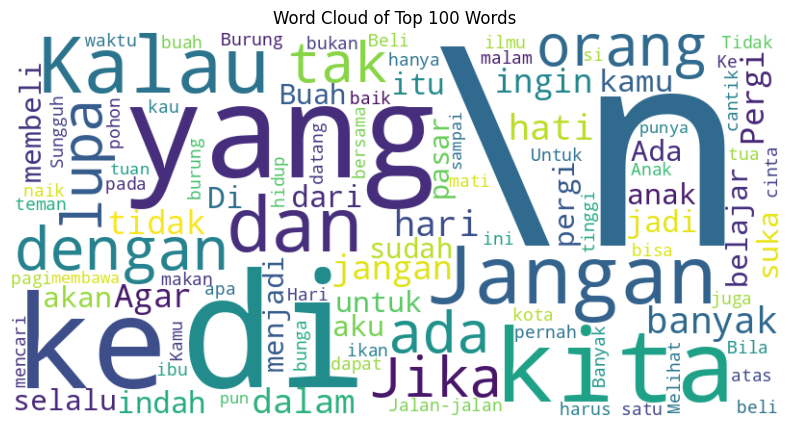

In [24]:
# Menggabungkan semua teks menjadi satu string
all_text = " ".join(df['teks'])

# Menghitung frekuensi munculnya setiap kata
word_frequencies = {}

for word in all_text.split():
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

# Mengurutkan kata-kata berdasarkan frekuensi munculnya
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Mengambil 100 kata yang paling sering muncul
top_100_words = dict(sorted_word_frequencies[:100])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)

# Plot wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 100 Words')
plt.show()


In [25]:
top_100_words

{'\\n': 3692,
 'di': 510,
 'yang': 329,
 'ke': 321,
 'kita': 183,
 'Jangan': 174,
 'Kalau': 162,
 'dan': 153,
 'dengan': 144,
 'ada': 128,
 'orang': 128,
 'tak': 124,
 'Jika': 122,
 'lupa': 122,
 'banyak': 112,
 'hati': 104,
 'hari': 104,
 'dalam': 97,
 'jangan': 91,
 'ingin': 87,
 'Agar': 87,
 'tidak': 86,
 'Pergi': 83,
 'kamu': 80,
 'Di': 77,
 'itu': 77,
 'dari': 77,
 'indah': 76,
 'jadi': 75,
 'untuk': 72,
 'membeli': 71,
 'belajar': 71,
 'pergi': 71,
 'selalu': 71,
 'akan': 70,
 'anak': 70,
 'Ada': 69,
 'suka': 67,
 'aku': 67,
 'Buah': 63,
 'sudah': 63,
 'menjadi': 62,
 'pasar': 61,
 'Jalan-jalan': 61,
 'ikan': 59,
 'buah': 58,
 'kau': 58,
 'satu': 57,
 'kota': 54,
 'bisa': 52,
 'baik': 52,
 'ilmu': 51,
 'ini': 49,
 'Ke': 48,
 'cinta': 48,
 'ibu': 48,
 'cantik': 48,
 'Anak': 47,
 'makan': 47,
 'Untuk': 46,
 'juga': 46,
 'Burung': 46,
 'Beli': 45,
 'pernah': 45,
 'bukan': 45,
 'Tidak': 44,
 'teman': 44,
 'harus': 44,
 'malam': 44,
 'burung': 44,
 'Bila': 44,
 'dapat': 43,
 'hidup': 

In [26]:
top_10_words_df = pd.DataFrame(sorted_word_frequencies[:10], columns=['Word', 'Frequency'])
top_10_words_df

,Word,Frequency
0,\n,3692
1,di,510
2,yang,329
3,ke,321
4,kita,183
5,Jangan,174
6,Kalau,162
7,dan,153
8,dengan,144
9,ada,128


In [27]:
uncommon_chars = df['teks'].str.findall(r'[^a-zA-Z0-9\s]').explode().unique()
uncommon_chars

array(['\\', '-', '?', ',', '.', '…', '_', '(', ':', ')', ';', '&', '😛',
       '’', '/', '!', "'", '😀', nan, '–'], dtype=object)

In [28]:
df['teks'][436]

'Pergi ke pasar bareng bibi \\n Tidak lupa membeli makanan \\n Cuma punya satu kaki \\n Tiga warna berganti-gantian'

In [29]:
df['teks'] = df['teks'].str.replace('…', '')
df['teks'] = df['teks'].str.replace('_', '-')
df['teks'] = df['teks'].str.replace(';', '')
df['teks'] = df['teks'].str.replace('’', '')
df['teks'] = df['teks'].str.replace('😀', '')
df['teks'] = df['teks'].str.replace('😛', '')
df['teks'] = df['teks'].str.replace('.. \n', ' \n')
df['teks'] = df['teks'].str.replace('..,', '')
df['teks'] = df['teks'].str.replace('.', '')
df['teks'] = df['teks'].str.replace('..', '')
df['teks'] = df['teks'].str.replace('...', '')
df['teks'] = df['teks'].str.replace('....', '')
df['teks'] = df['teks'].str.replace(',,,,', '')
df['teks'] = df['teks'].str.replace(',,,', '')
df['teks'] = df['teks'].str.replace(',,', '')
df['teks'] = df['teks'].str.replace('?????', '?')
df['teks'] = df['teks'].str.replace(r"(\.{2,}|;{2,}|,{2,}|!{2,}|?{2,}| {2,})", "")
df['teks'] = df['teks'].str.replace(r"\.{2,}|;{2,}|,{2,}|!{2,}|?{2,}| {2,}", "")
df['teks'] = df['teks'].str.replace(', \n', ' \n')
df['teks'] = df['teks'].str.replace('. \n', ' \n')
df['teks'] = df['teks'].str.replace(', \\n', ' \\n')
df['teks'] = df['teks'].str.replace('. \\n', ' \\n')
df['teks'] = df['teks'].str.replace(r', \n', ' \n')
df['teks'] = df['teks'].str.replace(r'. \n', ' \n')
df['teks'] = df['teks'].str.replace(r', \\n', ' \\n')
df['teks'] = df['teks'].str.replace(r'. \\n', ' \\n')
df['teks'] = df['teks'].str.replace(r',  \\n', '  \\n')
df['teks'] = df['teks'].str.replace(',  \\n', ' \\n')
df['teks'] = df['teks'].str.replace('(Dedeh Nurhaidah, 0905527', '')
df['teks'] = df['teks'].str.replace('Pantun untuk Ibu Terkasih \\n', '')
df['teks'] = df['teks'].str.replace('Perompak masuk mengacau negeri \n Majulah terus sahabat setia \n Majulah Syiria mengamankan negara', 'Perompak masuk mengacau negeri \n Majulah terus sahabat setia')
df['teks'] = df['teks'].str.replace('\( ', '\(')
df['teks'] = df['teks'].str.replace('\ )', '\)')
df['teks'] = df['teks'].str.replace('\n (', '(')
df['teks'] = df['teks'].str.replace('\\n (', '(')
df['teks'] = df['teks'].str.replace(r'\n (', '(')
df['teks'] = df['teks'].str.replace(r'\\n (', '(')
df['teks'] = df['teks'].str.replace("\\n", "\n")
df['teks'] = df['teks'].str.replace('    ', ' ')
# Pisahkan nilai teks menjadi dua bagian
row_index = df[df['teks'].str.contains("\\n \\n")].index[0]
text_parts = df.loc[row_index, 'teks'].split('\n \n')
df.loc[row_index, 'teks'] = text_parts[0]
new_row = pd.DataFrame({'teks': [text_parts[1]], 'tipe': [df.loc[row_index, 'tipe']]})
df = pd.concat([df, new_row], ignore_index=True)
df['teks'] = df['teks'].str.lstrip()
df['teks'] = df['teks'].str.rstrip()
df['teks'] = df['teks'].str.replace("\n", "\\n")
df = df[df['teks'].str.count(r'\\n') == 3]

In [30]:
df['teks'][436]

'Pergi ke pasar bareng bibi \\n Tidak lupa membeli makanan \\n Cuma punya satu kaki \\n Tiga warna berganti-gantian'

In [31]:
df['teks'][1207]

'Joni suka olahraga lari \\n Budi suka memahat \\n Jaga pola makan sehari-hari \\n Agar tubuh menjadi sehat'

In [32]:
df[df['teks'].str.count(r'\\n') != 3]

,teks,tipe


In [33]:
pd.set_option('display.max_row', False)
df

,teks,tipe
0,Ada motor ada sepeda \n Semuanya beroda dua \n Indonesia kaya budaya \n Sepatutnya kita menjaganya,Pantun Adat dan Alam
1,Ada pisang ada semangka \n Jika dimakan manis rasanya \n Indonesia ragam budaya \n Tugas kita tuk menjaganya,Pantun Adat dan Alam
2,Ada rusa ada buaya \n Sungguh hitam warna matanya \n Ada adat seribu bahasa \n Kita wajib menghormatinya,Pantun Adat dan Alam
3,Alat timbang pucuknya patah \n Beli baru hendak dipesan \n Alam terkembang amat indah \n Dipandang-pandang tiada bosan,Pantun Adat dan Alam
4,Anak cina makan petai \n Kakinya terikat rantai \n Lihatlah indahnya pantai \n Membuat jiwa terasa santai,Pantun Adat dan Alam
5,Bahagia hati akan menikah \n Duduk sendiri di dalam rumah \n Walau lelah kaki melangkah \n Puncak gunung sangatlah indah,Pantun Adat dan Alam
6,Bayi datang ke darat \n Dari Makassar langsung ke Deli \n Hidup di dunia untuk peradaban \n Bahasa tidak dibeli dan dijual,Pantun Adat dan Alam
7,Beli gudek di Jogjakarta \n Beli markisa di Medan \n Kalau kalian memang pemuda \n Mari bersama lesarikan hutan,Pantun Adat dan Alam
8,Beli sepatu yang warnanya bagus \n Belinya dipasar kamis \n Jangan sampai hutan hangus \n Nanti air bisa habis,Pantun Adat dan Alam
...,...,...


In [34]:
print(len(df))
df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True, subset='teks')
df.reset_index(drop=True, inplace=True)
df = df[['teks','tipe']]
print(len(df))
df.to_csv('dataset-pantun.csv')

1494
1450


In [35]:
df[df['teks'].str.contains("Hendaklah tunggu kapal berlabuh")]

,teks,tipe
1234,Hendaklah tunggu kapal berlabuh \n Berlabuh kapal membawa salak \n Belajarlah kamu bersungguh sungguh \n Agar bahagia hidupmu kelak,None


Top 10 kata yang paling sering muncul:
orang: 152
pergi: 146
hati: 123
lupa: 117
buah: 116
anak: 112
ikan: 94
burung: 85
indah: 83
beli: 80


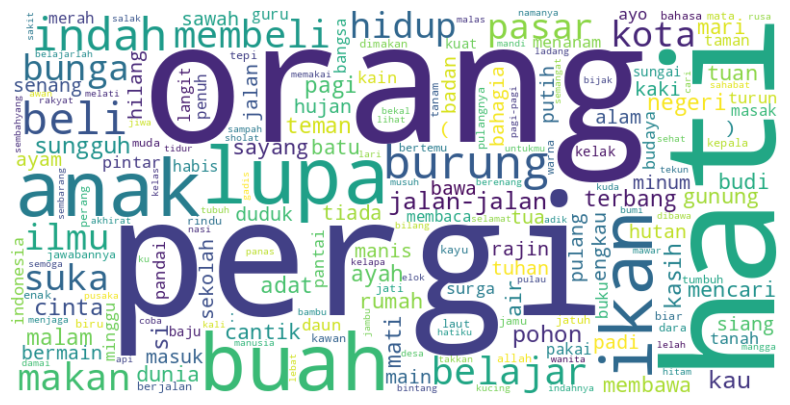

In [36]:
def clean_text_and_get_words(text):
    # Menghapus koma dan titik
    text = text.replace('\\n','').replace('?','')
    text = re.sub(r'[,.]', '', text)
    # Tokenisasi kata
    tokens = word_tokenize(text.lower())
    # Mengambil daftar stopword dalam bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))
    # Menghapus stopword dari tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Membersihkan teks dan mendapatkan kata-kata
all_text = " ".join(df['teks'])
filtered_words = clean_text_and_get_words(all_text)

# Menghitung frekuensi kemunculan kata
word_freq = Counter(filtered_words)

# Ambil 10 kata yang paling sering muncul
top_10_words = word_freq.most_common(10)

# Tampilkan top 10 kata yang paling sering muncul
print("Top 10 kata yang paling sering muncul:")
for word, freq in top_10_words:
    print(f"{word}: {freq}")

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
full_text = ' '.join(df['teks'])
tokenized_text = word_tokenize(full_text)
jumlah_kata = len(tokenized_text)
unique_tokens = set(tokenized_text)
jumlah_kata_unik = len(unique_tokens)
stop_words = set(stopwords.words('indonesian'))
unique_stopwords = set([token for token in unique_tokens if token in stop_words])
jumlah_kata_dasar_unik = len(unique_stopwords)
jumlah_suku_kata = sum(syllapy.count(text) for text in tokenized_text)

# Print informasi
print("Jumlah kata:", jumlah_kata)
print("Jumlah kata unik:", jumlah_kata_unik)
print("Jumlah kata dasar/stopword unik:", jumlah_kata_dasar_unik)
print("Jumlah suku kata:", jumlah_suku_kata)

Jumlah kata: 29169
Jumlah kata unik: 6155
Jumlah kata dasar/stopword unik: 345
Jumlah suku kata: 58361
